# Module preservation based on one one network

## Load libraries

In [2]:
library('gplots')
library('ggplot2')
library('knitr')
library('limma')
library('reshape2')
library('RColorBrewer')
library('WGCNA')
library("broman")

### Use the log values from WGNCA analsis i.e. which was used for identifying modules after normalization

## Opening the "df1" as the "reference file" and "df2" as a "test file" 

### The reference file is with the module  information and test file WO module information, the objective of this is to test if the modules detected in the reference set is preserved in the test set


In [3]:
setwd("/home/nhk/Desktop/")

df1 = read.csv("reference.csv")

# the following data frame contains
# the gene expression data: columns are genes, rows are arrays (samples)
datExpr_df1=t(df1[,c(2:9)])

# Set the columns names to Gene ID
colnames(datExpr_df1) = df1$Gene_ID

# This module assignment 
colorsIllu = df1$module

df2 = read.csv("test.csv")

# the following data frame contains
# the gene expression data: columns are genes, rows are arrays (samples)
datExpr_df2=t(df2[,c(2:9)])

# Set the columns names to Gene ID
colnames(datExpr_df2) = df2$Gene_ID


datExpr_df2
#colorsIllu

,0610010F05Rik,0610010K14Rik,0610012G03Rik,0610040J01Rik,1110008P14Rik,1110017D15Rik,1110032A03Rik,1110038F14Rik,1110065P20Rik,1190005I06Rik,⋯,Zranb2,Zscan22,Zscan26,Zswim5,Zswim6,Zswim7,Zup1,Zyg11b,Zzef1,Zzz3
Total_6m_1,0.6361186,1.4221545,1.6534710,1.1654135,1.4588058,1.3752482,1.2803731,1.4732289,1.5258695,1.6018681,⋯,0.7253820,0.9164607,0.5055942,0.7141473,0.4447962,1.6731452,1.2547835,0.3434243,0.6442059,0.6899049
Total_6m_2,1.1741240,1.3435802,1.4673551,1.5012531,1.3864045,1.5287889,1.2712039,1.3187174,1.3854556,1.4395797,⋯,0.9745331,0.9738013,0.5400665,0.7281977,0.8975069,1.3402062,1.6998993,0.3607940,0.6255218,0.8736985
Total_6m_3,0.7859838,1.3197297,1.4120482,1.4837093,1.3404679,1.8782263,1.3312782,1.2945563,1.3388905,1.3292469,⋯,0.8327674,0.8630746,0.8255216,0.7335271,0.5927978,1.3946257,1.7381672,0.2918114,0.7167561,1.0113173
Total_6m_4,0.3180593,1.4804558,1.6181297,1.6290727,1.3647304,1.8835208,1.4305588,1.5185682,1.3966657,1.7022767,⋯,0.4282683,1.0044488,0.4402782,0.5658915,0.3640681,1.5288153,1.5891239,0.2669975,0.6133969,0.5459484
Total_24m_1,1.4436658,0.6802703,0.5879518,0.8345865,0.6595321,0.6247518,0.7038179,0.6598061,0.6241736,0.6707531,⋯,1.1676570,1.1606525,1.4665860,1.2829457,1.2172537,0.6381612,0.6465257,1.6392060,1.2832439,1.3444998
Total_24m_2,0.9595687,0.6325692,0.5064831,0.5651629,0.5436668,0.4023825,0.7287961,0.7000746,0.6593849,0.6147110,⋯,1.0254669,1.2387543,1.1938313,1.3313953,1.1571033,0.6452594,0.6304129,1.8377171,1.3981316,1.0674513
Total_24m_3,1.0404313,0.6678150,0.4986804,0.7017544,0.5667317,0.4063534,0.6556003,0.7054437,0.6611095,0.6322242,⋯,1.2351443,1.1586752,1.1744784,1.2664729,1.1024931,0.6597938,0.7452165,1.8079404,1.4696879,0.9886827
Total_24m_4,1.2452830,0.5376971,0.3150889,0.3947368,0.4238608,0.3692919,0.6157616,0.6123788,0.4065824,0.3981319,⋯,1.5067912,0.9955512,1.5300877,1.3217054,1.6557182,0.4427920,0.7150050,2.7017370,1.8449612,1.4015392


In [4]:
df1

Gene_ID,Illu_6m_1,Illu_6m_2,Illu_6m_3,Illu_6m_4,Illu_24m_1,Illu_24m_2,Illu_24m_3,Illu_24m_4,module
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0610009B22Rik,1.3009009,1.2444444,1.2461261,1.1413814,0.8586186,0.7183183,0.7717718,0.7203604,turquoise
0610010K14Rik,1.3411886,1.1483300,1.1684980,1.2517573,0.8516700,0.6851514,0.6546033,0.5014573,turquoise
0610012G03Rik,1.3214843,1.1627699,1.2525989,1.3905792,0.8372301,0.6280225,0.6062031,0.5009710,turquoise
0610030E20Rik,1.3109547,1.0337484,1.0193106,1.0998015,0.9806894,0.7901101,0.7002346,0.7738675,turquoise
0610040J01Rik,1.3249703,0.9687046,1.1049782,1.1749637,1.0312954,0.7444870,0.6966856,0.5836524,turquoise
1110002E22Rik,0.5191410,1.0457516,0.8029879,1.2231559,0.8291317,1.0457516,0.9542484,1.4341737,blue
1110004F10Rik,0.9720786,1.1674681,1.0601059,0.9501576,1.0468523,0.9009011,0.9501576,1.0279214,grey
1110017D15Rik,1.4407399,1.1484190,1.2329533,1.5837815,0.8515810,0.4082598,0.4192299,0.3161970,turquoise
1110032A03Rik,1.2100398,1.1649234,1.1279095,1.2175899,0.8720905,0.6248159,0.6030127,0.5102387,turquoise


### goodSamplesGenes() to check if the genes and samples are good i.e. whether the df1 could be used for module preservation analysis 

In [5]:
#checkSets(multiExpr, checkStructure = TRUE, useSets = NULL)

DSG_df1 = goodSamplesGenes( datExpr_df1, 
                 weights = NULL,
                           minFraction = 1/2, 
                           minNSamples = 3, 
                           minNGenes = 10000, 
                           tol = NULL,
                           minRelativeWeight = 0.1,
                           verbose = 1, indent = 0)

 Flagging genes and samples with too many missing values...
  ..step 1
  ..step 2


### Find the number of genes which are not of good quality in df1

In [6]:
sum(!(DSG_df1$goodGenes))

[1] 2

### Subselection of good genes with expression values in df1

In [7]:
#only good genes
datExpr_df1_rm = datExpr_df1[,(DSG_df1$goodGenes)] 


datExpr_df1_rm

,0610009B22Rik,0610010K14Rik,0610012G03Rik,0610030E20Rik,0610040J01Rik,1110002E22Rik,1110004F10Rik,1110017D15Rik,1110032A03Rik,1110032F04Rik,⋯,Zup1,Zw10,Zwilch,Zwint,Zxdb,Zxdc,Zyg11b,Zyx,Zzef1,Zzz3
Illu_6m_1,1.3009009,1.3411886,1.3214843,1.3109547,1.3249703,0.5191410,0.9720786,1.4407399,1.2100398,0.7530378,⋯,1.6328144,1.0793442,0.8581081,0.6427635,0.9460079,0.7984589,0.4285714,1.0614972,0.6977445,1.0245336
Illu_6m_2,1.2444444,1.1483300,1.1627699,1.0337484,0.9687046,1.0457516,1.1674681,1.1484190,1.1649234,0.9898194,⋯,1.5290339,1.1039368,1.4864865,0.8351494,0.9394634,0.8042743,0.4440084,1.0036133,0.7584179,0.9754664
Illu_6m_3,1.2461261,1.1684980,1.2525989,1.0193106,1.1049782,0.8029879,1.0601059,1.2329533,1.1279095,1.0000000,⋯,1.3110946,1.1461391,0.9076577,0.7514095,0.9872382,0.7863919,0.3728414,0.9637421,0.7399864,0.8664610
Illu_6m_4,1.1413814,1.2517573,1.3905792,1.0998015,1.1749637,1.2231559,0.9501576,1.5837815,1.2175899,1.0000000,⋯,1.3773165,1.0848092,0.7567568,0.6649440,1.0127618,0.8214299,0.3608059,1.0501923,0.6727149,0.6757749
Illu_24m_1,0.8586186,0.8516700,0.8372301,0.9806894,1.0312954,0.8291317,1.0468523,0.8515810,0.8720905,0.7701149,⋯,0.6721028,0.9206558,1.0923423,1.1648506,0.9664594,1.1785701,1.5559916,1.0599231,1.2415821,0.9061260
Illu_24m_2,0.7183183,0.6851514,0.6280225,0.7901101,0.7444870,1.0457516,0.9009011,0.4082598,0.6248159,1.1714286,⋯,0.6889054,0.8737982,1.3806306,1.1755579,1.5031086,1.2367972,3.1255887,0.9963867,1.5935023,1.5410607
Illu_24m_3,0.7717718,0.6546033,0.6062031,0.7002346,0.6966856,0.9542484,0.9501576,0.4192299,0.6030127,1.4863711,⋯,0.6221893,0.8234996,0.8851351,1.2076098,1.5822971,1.2810671,3.2496075,0.9717914,1.7661993,1.3444983
Illu_24m_4,0.7203604,0.5014573,0.5009710,0.7738675,0.5836524,1.4341737,1.0279214,0.3161970,0.5102387,1.3894910,⋯,0.5648629,0.7935432,1.1869369,1.3897596,1.6850458,1.2277105,4.9099948,0.8228781,2.2290673,1.5187307


In [8]:
#creating a dataframe with module info which are good genes 

#Colnames i.e the gene name from the df1 with good genes
CN = as.data.frame(colnames(datExpr_df1_rm))

CN$Gene_ID = colnames(datExpr_df1_rm)

#merging with df1 based on Gene_ID to get the expression values 
CN = merge(x = CN, y = df1, by = "Gene_ID", all.y=TRUE)

CN = CN[!duplicated(c(CN$Gene_ID,CN$module)),]

#omitting NA's
CN = na.omit(CN)

# the following data frame contains
# the gene expression data: columns are genes, rows are arrays (samples)

datExpr_df1_rm_PFT=t(CN[,c(3:10)])

# Set the columns names to Gene ID
colnames(datExpr_df1_rm_PFT) = CN$Gene_ID

# This module assignment 
colorsIllu = CN$module


datExpr_df1_rm_PFT

,0610009B22Rik,0610010K14Rik,0610012G03Rik,0610030E20Rik,0610040J01Rik,1110002E22Rik,1110004F10Rik,1110017D15Rik,1110032A03Rik,1110032F04Rik,⋯,Zup1,Zw10,Zwilch,Zwint,Zxdb,Zxdc,Zyg11b,Zyx,Zzef1,Zzz3
Illu_6m_1,1.3009009,1.3411886,1.3214843,1.3109547,1.3249703,0.5191410,0.9720786,1.4407399,1.2100398,0.7530378,⋯,1.6328144,1.0793442,0.8581081,0.6427635,0.9460079,0.7984589,0.4285714,1.0614972,0.6977445,1.0245336
Illu_6m_2,1.2444444,1.1483300,1.1627699,1.0337484,0.9687046,1.0457516,1.1674681,1.1484190,1.1649234,0.9898194,⋯,1.5290339,1.1039368,1.4864865,0.8351494,0.9394634,0.8042743,0.4440084,1.0036133,0.7584179,0.9754664
Illu_6m_3,1.2461261,1.1684980,1.2525989,1.0193106,1.1049782,0.8029879,1.0601059,1.2329533,1.1279095,1.0000000,⋯,1.3110946,1.1461391,0.9076577,0.7514095,0.9872382,0.7863919,0.3728414,0.9637421,0.7399864,0.8664610
Illu_6m_4,1.1413814,1.2517573,1.3905792,1.0998015,1.1749637,1.2231559,0.9501576,1.5837815,1.2175899,1.0000000,⋯,1.3773165,1.0848092,0.7567568,0.6649440,1.0127618,0.8214299,0.3608059,1.0501923,0.6727149,0.6757749
Illu_24m_1,0.8586186,0.8516700,0.8372301,0.9806894,1.0312954,0.8291317,1.0468523,0.8515810,0.8720905,0.7701149,⋯,0.6721028,0.9206558,1.0923423,1.1648506,0.9664594,1.1785701,1.5559916,1.0599231,1.2415821,0.9061260
Illu_24m_2,0.7183183,0.6851514,0.6280225,0.7901101,0.7444870,1.0457516,0.9009011,0.4082598,0.6248159,1.1714286,⋯,0.6889054,0.8737982,1.3806306,1.1755579,1.5031086,1.2367972,3.1255887,0.9963867,1.5935023,1.5410607
Illu_24m_3,0.7717718,0.6546033,0.6062031,0.7002346,0.6966856,0.9542484,0.9501576,0.4192299,0.6030127,1.4863711,⋯,0.6221893,0.8234996,0.8851351,1.2076098,1.5822971,1.2810671,3.2496075,0.9717914,1.7661993,1.3444983
Illu_24m_4,0.7203604,0.5014573,0.5009710,0.7738675,0.5836524,1.4341737,1.0279214,0.3161970,0.5102387,1.3894910,⋯,0.5648629,0.7935432,1.1869369,1.3897596,1.6850458,1.2277105,4.9099948,0.8228781,2.2290673,1.5187307


### goodSamplesGenes() to check if the genes and samples are good i.e. whether the df2 could be used for module preservation analysis 

In [10]:
#checkSets(multiExpr, checkStructure = TRUE, useSets = NULL)

DSG_df2 = goodSamplesGenes( datExpr_df2, 
                 weights = NULL,
                           minFraction = 1/2, 
                           minNSamples = 1, 
                           minNGenes = 100, 
                           tol = NULL,
                           minRelativeWeight = 0.1,
                           verbose = 1, indent = 0)

 Flagging genes and samples with too many missing values...
  ..step 1
  ..step 2


### Find the number of genes which are not of good quality in df2

In [11]:
sum(!(DSG_df2$goodGenes))

[1] 1

### Subselection of good genes with expression values in df2

In [12]:
datExpr_df2_rm_PFT = datExpr_df2[,(DSG_df2$goodGenes)] 

datExpr_df2_rm_PFT 

,0610010F05Rik,0610010K14Rik,0610012G03Rik,0610040J01Rik,1110008P14Rik,1110017D15Rik,1110032A03Rik,1110038F14Rik,1110065P20Rik,1190005I06Rik,⋯,Zranb2,Zscan22,Zscan26,Zswim5,Zswim6,Zswim7,Zup1,Zyg11b,Zzef1,Zzz3
Total_6m_1,0.6361186,1.4221545,1.6534710,1.1654135,1.4588058,1.3752482,1.2803731,1.4732289,1.5258695,1.6018681,⋯,0.7253820,0.9164607,0.5055942,0.7141473,0.4447962,1.6731452,1.2547835,0.3434243,0.6442059,0.6899049
Total_6m_2,1.1741240,1.3435802,1.4673551,1.5012531,1.3864045,1.5287889,1.2712039,1.3187174,1.3854556,1.4395797,⋯,0.9745331,0.9738013,0.5400665,0.7281977,0.8975069,1.3402062,1.6998993,0.3607940,0.6255218,0.8736985
Total_6m_3,0.7859838,1.3197297,1.4120482,1.4837093,1.3404679,1.8782263,1.3312782,1.2945563,1.3388905,1.3292469,⋯,0.8327674,0.8630746,0.8255216,0.7335271,0.5927978,1.3946257,1.7381672,0.2918114,0.7167561,1.0113173
Total_6m_4,0.3180593,1.4804558,1.6181297,1.6290727,1.3647304,1.8835208,1.4305588,1.5185682,1.3966657,1.7022767,⋯,0.4282683,1.0044488,0.4402782,0.5658915,0.3640681,1.5288153,1.5891239,0.2669975,0.6133969,0.5459484
Total_24m_1,1.4436658,0.6802703,0.5879518,0.8345865,0.6595321,0.6247518,0.7038179,0.6598061,0.6241736,0.6707531,⋯,1.1676570,1.1606525,1.4665860,1.2829457,1.2172537,0.6381612,0.6465257,1.6392060,1.2832439,1.3444998
Total_24m_2,0.9595687,0.6325692,0.5064831,0.5651629,0.5436668,0.4023825,0.7287961,0.7000746,0.6593849,0.6147110,⋯,1.0254669,1.2387543,1.1938313,1.3313953,1.1571033,0.6452594,0.6304129,1.8377171,1.3981316,1.0674513
Total_24m_3,1.0404313,0.6678150,0.4986804,0.7017544,0.5667317,0.4063534,0.6556003,0.7054437,0.6611095,0.6322242,⋯,1.2351443,1.1586752,1.1744784,1.2664729,1.1024931,0.6597938,0.7452165,1.8079404,1.4696879,0.9886827
Total_24m_4,1.2452830,0.5376971,0.3150889,0.3947368,0.4238608,0.3692919,0.6157616,0.6123788,0.4065824,0.3981319,⋯,1.5067912,0.9955512,1.5300877,1.3217054,1.6557182,0.4427920,0.7150050,2.7017370,1.8449612,1.4015392


### rechecking the reference and test set 

In [14]:
#checkSets(multiExpr, checkStructure = TRUE, useSets = NULL)

goodSamplesGenes( datExpr_df2_rm_PFT, 
                 weights = NULL,
  minFraction = 1/2, 
  minNSamples = 4, 
  minNGenes = 100, 
  tol = NULL,
  minRelativeWeight = 0.1,
  verbose = 1, indent = 0)

 Flagging genes and samples with too many missing values...
  ..step 1


$goodGenes
   [1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [15] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [29] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [43] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [57] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [71] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [85] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [99] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [113] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [127] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [141] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [155] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [169] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [183] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [197] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [211] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [225] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [239] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [253] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [267] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [281] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [295] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [309] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [323] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [337] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [351] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [365] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [379] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [393] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [407] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [421] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [435] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [449] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [463] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [477] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [491] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [505] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [519] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [533] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [547] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [561] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [575] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [589] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [603] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [617] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [631] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [645] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [659] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [673] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [687] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [701] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [715] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE 

### Create a multiExpr in data format for module preservation analysis

In [15]:
setLabels = c("Illu", "Human");
multiExpr = list(Illu = list(data = datExpr_df1_rm_PFT), Human = list(data = datExpr_df2_rm_PFT));
multiColor = list(Illu = colorsIllu);


#multiColor
#multiExpr

### Calculation of module preservation 


##### Should take ~1hr so it is better to save and load the "mp" as an image


In [16]:
system.time( {
    mp = modulePreservation(multiExpr, multiColor,
                            referenceNetworks = 1,
                            nPermutations = 200,
                            randomSeed = 1,
                            quickCor = 0,
                            networkType = "signed",
                            verbose = 3)
} );

  ..checking data for excessive amounts of missing data..
     Flagging genes and samples with too many missing values...
      ..step 1
     Flagging genes and samples with too many missing values...
      ..step 1
  ..unassigned 'module' name: grey 
  ..all network sample 'module' name: gold
  ..calculating observed preservation values
  ..calculating permutation Z scores
 ..Working with set 1 as reference set
 ....working with set 2 as test set
  ......working on permutation 1
  ......working on permutation 2
  ......working on permutation 3
  ......working on permutation 4
  ......working on permutation 5
  ......working on permutation 6
  ......working on permutation 7
  ......working on permutation 8
  ......working on permutation 9
  ......working on permutation 10
  ......working on permutation 11
  ......working on permutation 12
  ......working on permutation 13
  ......working on permutation 14
  ......working on permutation 15
  ......working on permutation 16
  ......worki

   user  system elapsed 
462.872  11.053 474.455 

### Save the module preservation results to R image 

In [18]:
# Save the results
save(mp, file = "modulePreservation_second_independent_cohort_to_short_read_dataset.RData");

### Load the save module preservatin results R image

In [3]:
load(file = "modulePreservation_second_independent_cohort_to_short_read_dataset.RData")

### Analysis and display of module preservation results

#### Isolate the observed statistics and their Z scores

In [19]:
ref = 1
test = 2
statsObs = cbind(mp$quality$observed[[ref]][[test]][, -1], mp$preservation$observed[[ref]][[test]][, -1])
statsZ = cbind(mp$quality$Z[[ref]][[test]][, -1], mp$preservation$Z[[ref]][[test]][, -1]);

In [20]:
statsZ

,Zsummary.qual,Z.propVarExplained.qual,Z.meanSignAwareKME.qual,Z.meanSignAwareCorDat.qual,Z.meanAdj.qual,Z.meanMAR.qual,Zsummary.pres,Zdensity.pres,Zconnectivity.pres,Z.propVarExplained.pres,Z.meanSignAwareKME.pres,Z.meanSignAwareCorDat.pres,Z.meanAdj.pres,Z.meanMAR.pres,Z.cor.kIM,Z.cor.kME,Z.cor.kMEall,Z.cor.cor,Z.cor.MAR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
black,3.2034588,0.5072628,1.4379247,13.050209,4.9689930,-5.1864080,6.668949,10.670346,2.667553,-9.145133,17.157294,92.20004,4.183397,-10.908407,2.667553,2.061352,109.57404,15.056394,2.622441
blue,23.1409262,11.4568458,10.8888890,37.782777,34.8250067,5.4267982,29.250685,37.432981,21.068389,-5.983279,35.994616,344.16837,38.871347,-10.805072,16.027790,21.068389,109.86664,157.417720,15.718816
brown,37.1235017,26.5846314,21.9072676,47.662372,77.5501120,41.1820581,42.390628,69.193169,15.588086,18.174652,40.713373,427.17372,97.672966,18.251251,14.752384,15.588086,109.69973,159.930411,14.936464
gold,0.6223913,0.7429449,0.6810932,-1.132247,0.5636894,0.7266594,36.124115,24.455284,47.792946,1.367438,47.543130,639.58963,1.145534,1.123717,20.552270,47.792946,109.36961,634.733786,20.716138
green,7.1458945,3.2370526,3.4930081,13.718880,10.7987810,-0.7796155,8.849800,9.213561,8.486038,-10.110490,16.198699,76.30041,2.228424,-10.584342,5.778269,8.486038,107.36725,42.257691,6.408022
grey,-15.7979009,-22.0933253,-21.2179269,1.267981,-10.3778748,-17.2564505,6.881041,4.276594,9.485487,-17.385311,12.792737,48.20351,-4.239548,-12.122005,9.485487,9.288820,14.98645,46.845090,7.612105
magenta,1.2115923,0.3127963,0.5404223,3.748607,1.8827623,-1.0029130,2.599394,2.607005,2.591783,-2.713435,3.605039,5.25698,1.608972,-1.541065,2.628731,1.032481,91.23057,2.591783,2.389488
pink,1.9826226,0.6523105,1.0318331,5.959371,2.9334120,-2.0350308,2.165841,2.111590,2.220092,-8.982027,7.674376,20.79002,-3.451197,-7.607000,2.201214,2.220092,92.07098,5.626528,1.973252
red,6.6885415,3.0280222,3.0512756,12.992903,10.3258073,1.3274922,15.898595,21.801639,9.995550,4.010554,16.872866,85.06711,26.730411,3.501455,9.995550,8.417181,109.03023,37.191535,9.316072


#### the main output: the preservation medianRank and Zsummary statistics

In [21]:
# Compare preservation to quality:
print( cbind(statsObs[, c("medianRank.pres", "medianRank.qual")],
signif(statsZ[, c("Zsummary.pres", "Zsummary.qual")], 2)) )

          medianRank.pres medianRank.qual Zsummary.pres Zsummary.qual
black                   7             9.5           6.7          3.20
blue                    5             4.0          29.0         23.00
brown                   1             1.0          42.0         37.00
gold                    5             9.5          36.0          0.62
green                   8             6.0           8.8          7.10
grey                   10            11.0           6.9        -16.00
magenta                 8             8.0           2.6          1.20
pink                   10             7.0           2.2          2.00
red                     2             5.0          16.0          6.70
turquoise               6             2.0          36.0         25.00
yellow                  4             3.0          31.0         22.00


#### plot the preservation, medianRank and Zsummary for the df1 modules as a function of module size. 

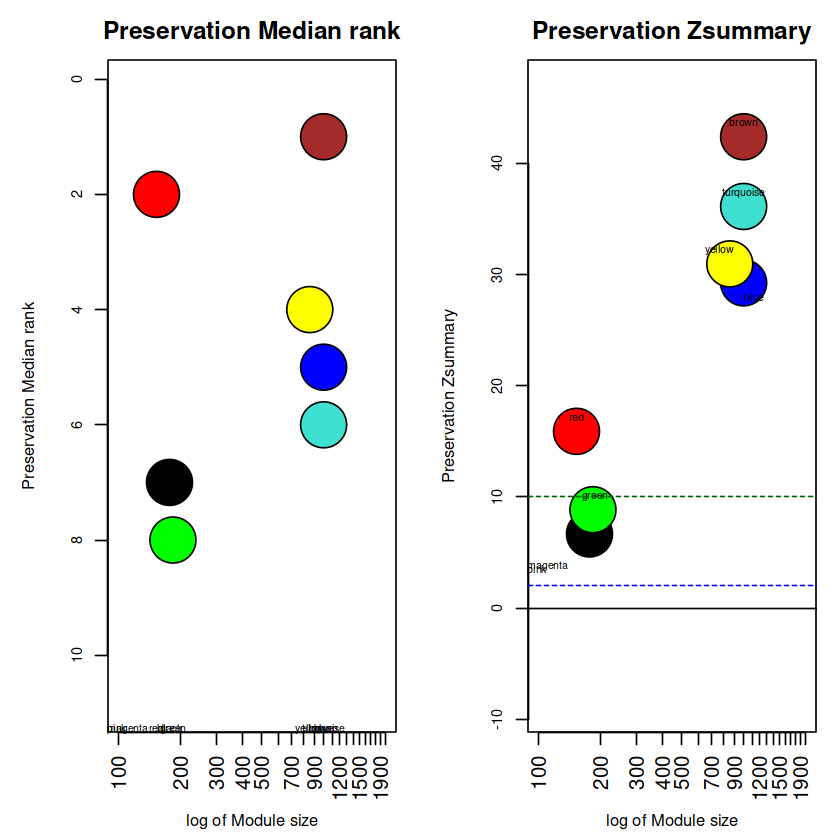

In [23]:
# Module labels and module sizes are also contained in the results
modColors = rownames(mp$preservation$observed[[ref]][[test]])
moduleSizes = mp$preservation$Z[[ref]][[test]][, 1];
# leave grey and gold modules out
plotMods = !(modColors %in% c("grey", "gold"));
# Text labels for points
text = modColors[plotMods];
# Auxiliary convenience variable
plotData = cbind(mp$preservation$observed[[ref]][[test]][, 2], mp$preservation$Z[[ref]][[test]][, 2])
# Main titles for the plot
mains = c("Preservation Median rank", "Preservation Zsummary");

# Start the plot
#sizeGrWindow(10, 5);
#pdf("Illu_GSE99074-modulePreservation-Zsummary-medianRank_log_x_for_paper.pdf", wi=10, h=5)

par(mfrow = c(1,2))
par(mar = c(4.5,4.5,2.5,1))
for (p in 1:2)
{
min = min(plotData[, p], na.rm = TRUE);
max = max(plotData[, p], na.rm = TRUE);
# Adjust ploting ranges appropriately
if (p==2)
{
if (min > -max/10) min = -max/10
ylim = c(min - 0.1 * (max-min), max + 0.1 * (max-min))
} else
ylim = c(max + 0.1 * (max-min), min - 0.1 * (max-min))
plot(moduleSizes[plotMods], plotData[plotMods, p], col = 1, 
     bg = modColors[plotMods], 
     pch = 21,
     main = mains[p],
     cex = 5,
     ylab = mains[p], xlab = "log of Module size", log = "x",
     ylim = ylim,
     xlim = c(100, 2000), xaxt='n',
     cex.lab = 0.8, cex.axis = 0.7, cex.main =1.2) 

#axis(side = 1, at=c(1,50,100,200,300,1000))    
axis(1, at = seq(100, 2000, by = 100), las=2)
    
    
labelPoints(moduleSizes[plotMods], plotData[plotMods, p], text, cex = 0.5, offs = 0.08);
    
# For Zsummary, add threshold lines
if (p==2)
{
abline(h=0)
abline(h=2, col = "blue", lty = 2)
abline(h=10, col = "darkgreen", lty = 2)
}
}
# If plotting into a file, close it
#dev.off();

In [33]:
# Module labels and module sizes are also contained in the results
modColors = rownames(mp$preservation$observed[[ref]][[test]])
moduleSizes = mp$preservation$Z[[ref]][[test]][, 1];
# leave grey and gold modules out
plotMods = !(modColors %in% c("grey", "gold"));
# Text labels for points
text = modColors[plotMods];
# Auxiliary convenience variable
plotData = cbind(mp$preservation$observed[[ref]][[test]][, 2], mp$preservation$Z[[ref]][[test]][, 2])
# Main titles for the plot
mains = c("Preservation Median rank", "Preservation Zsummary");

# Start the plot
sizeGrWindow(10, 5);
pdf("Illu_Nanopore-modulePreservation-Zsummary-medianRank_for_paper_axis.pdf", wi=10, h=5)

par(mfrow = c(1,2))
par(mar = c(4.5,4.5,2.5,1))
for (p in 1:2)
{
min = min(plotData[, p], na.rm = TRUE);
max = max(plotData[, p], na.rm = TRUE);
# Adjust ploting ranges appropriately
if (p==2)
{
if (min > -max/10) min = -max/10
ylim = c(min - 0.1 * (max-min), max + 0.1 * (max-min))
} else
ylim = c(max + 0.1 * (max-min), min - 0.1 * (max-min))
plot(moduleSizes[plotMods], plotData[plotMods, p], col = 1, 
     bg = modColors[plotMods], 
     pch = 21,
     main = mains[p],
     cex = 5,
     ylab = mains[p], xlab = "Module size",
     ylim = c(-2, 12),
     xlim = c(1, 1200), xaxt='n',
     cex.lab = 0.8, cex.axis = 0.7, cex.main =1.2)

axis(1, at = seq(1, 1200, by = 100), las=2)
    
labelPoints(moduleSizes[plotMods], plotData[plotMods, p], text, cex = 0.5, offs = 0.08);
    
# For Zsummary, add threshold lines
if (p==2)
{
abline(h=0)
abline(h=2, col = "blue", lty = 2)
abline(h=10, col = "darkgreen", lty = 2)
}
}
# If plotting into a file, close it
dev.off();

png 
  2

### plot the density and connectivity statistics all in one plot, including the module quality measures for comparison

In [ ]:
# Re-initialize module color labels and sizes
modColors = rownames(statsZ)
moduleSizes = mp$quality$Z[[ref]][[test]][, 1];
# Exclude improper modules
plotMods = !(modColors %in% c("grey", "gold"));
# Create numeric labels for each module
labs = match(modColors[plotMods], standardColors(50));
# Start the plot: open a suitably sized graphical window and set sectioning and margins.
#sizeGrWindow(12, 9);
#pdf("/run/user/1000/gvfs/smb-share:server=134.76.13.140,share=ukps-all$/AG-Fornasiero/LAB/Public/Nisha/Transcriptomics/Jena_Nano_Illu/WGNCA/Module_preservation/IlluOnly-Statistics_of_module_quality.pdf", wi=10, h=5)
par(mfrow = c(3,5))
par(mar = c(3,3,2,1))
par(mgp = c(1.6, 0.4, 0));
# Plot each Z statistic in a separate plot.
for (s in 1:ncol(statsZ))
{
min = min(statsZ[plotMods, s], na.rm = TRUE);
max = max(statsZ[plotMods, s], na.rm = TRUE);
if (min > -max/5) min = -max/5
plot(moduleSizes[plotMods], statsZ[plotMods, s], col = 1, bg = modColors[plotMods], pch = 21,
main = colnames(statsZ)[s],
cex = 1.7,
ylab = colnames(statsZ)[s], xlab = "Module size", log = "x",
ylim = c(min - 0.1 * (max-min), max + 0.1 * (max-min)),
xlim = c(20, 3000))
labelPoints(moduleSizes[plotMods], statsZ[plotMods, s], labs, cex = 0.7, offs = 0.04);
abline(h=0)
abline(h=2, col = "blue", lty = 2)
abline(h=10, col = "darkgreen", lty = 2)
}

#dev.off();